
1  # Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


# Step 1 | Data Pre-Processing

# Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [4]:
df=pd.read_csv(r"C:\Users\Sundar\Downloads\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.drop(columns=["User ID","Gender"], inplace=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Purchased'}>, <AxesSubplot:>]],
      dtype=object)

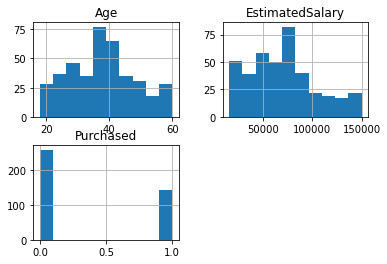

In [8]:
df.hist()


standardization will be needed in Feature Scaling

# Splitting the dataset into the Training set and Test set

In [9]:
y=df['Purchased']
x=df.drop(['Purchased'], axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=4)

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# Step 2 | Logistic Regression Model

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

In [11]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the Training set

In [12]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

# Step 3 | Prediction

In [13]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [14]:
df_new = pd.DataFrame({'True_Target': y_test, 'Predicted_target': y_pred})
df_new

,True_Target,Predicted_target
184,0,0
6,0,0
61,0,0
312,0,0
100,0,0
...,...,...
334,1,1
188,0,0
245,1,1
301,1,1


# Step 4 | Evaluating The Predection

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

In [15]:
#method 1
accuracy_test_set = logreg.score(x_test, y_test)
accuracy_test_set

0.8833333333333333

In [16]:
#method 2

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8833333333333333


In [17]:
#method 3

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        81
           1       0.84      0.79      0.82        39

    accuracy                           0.88       120
   macro avg       0.87      0.86      0.87       120
weighted avg       0.88      0.88      0.88       120



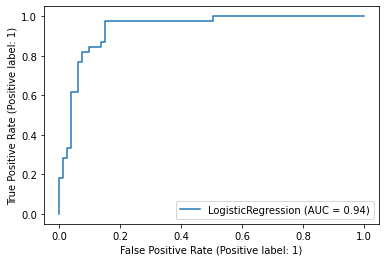

In [19]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg, x_test, y_test)

plt.show()

Accuracy: Accuracy is defined as all correctly predicted instances over all instances.
Accuracy=(TP+TN)/(TP+TN+FP+FN)
TP=True Positive
TN= True Negative
FP=False Positive
FN=False Negative

Precision: Precision measures the fraction of positive predictions matching the actuals. 
precision=TP/(TP+FP)

Recall: Recall measures the fraction of positive instances correctly identified.
Recall= TP/(TP+FN)

F1 or F-beta: While Precision tries to minimize FPs and Recall tries to minimize FNs, the F-1 metric maintains a balance between precision and recall and is defined as a harmonic mean between the two. 

F-beta is a weighted harmonic mean of precision and recall. 
F1= ((1+beta^2)(precision* recall))/((beta^2 * precision)+recall)

# Making the Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix


array([[75,  6],
       [ 8, 31]], dtype=int64)

# Visualization

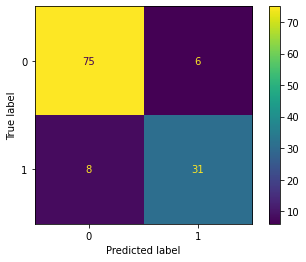

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=logreg.classes_).plot()
